Loan Application Data Pre-processing 
Presented by Shaun

Throughout the financial sector, machine learning algorithms are being developed to approve loan applications. In this project,we will be proceesing data and using techniques to construct three machine learning models to predict on loan approvals. A dataset with 1089 observations will be examined, cleaned and organised; a data exploration will identify the most important attributes, which are the best predictors for loan approvals.   


Data pre-processing is a data mining technique used to transform and prepare raw data into a state, so it is ready to be processed. We are going to identify observations in the data with a high probability of defaulting on a loan. In this project, we will build and deploy the following three machine learning algorithms:

     K-Nearest Neighbors
     Naïve Bayes
     Artificial Neural Networks
    

Furthermore, using metrics suchs as precision, recall, and F1-scores, we will investigate why the classification accuracy for these algorithms can be misleading.

In addition, we will explore the use of data visualization techniques common in data science, such as parameter histograms and correlation matrices, to gain a better understanding of the underlying distribution of data in our data set. Let's get started!
1. Importing Necessary Libraries



In [260]:
import numpy as np
import pandas as pd


##classifiers
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

##train test split
from sklearn.model_selection import train_test_split

##scoring metrics
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score, recall_score, f1_score,roc_curve, auc
 

##Visualisations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline






2. The Data Set

In the following cells, we will import our dataset from a .csv file as a Pandas DataFrame. Furthermore, we will begin exploring the dataset to gain an understanding of the type, quantity, and distribution of data in our dataset. For this purpose, we will use Pandas' built-in describe feature, as well as parameter histograms and a correlation matrix.


In [261]:
# Load the dataset from the csv file using pandas 

#data = pd.read_csv('c:\\ml\\LoanPredN.csv')
# Start exploring the dataset, # hash out each print line, so you can easily review the data brought back by each cmd

predata = pd.read_csv('c:\\ml\\LoanPredOrig.csv')
#print(predata.head())
#print(predata.info())

#print(predata.head())  # examine the first 5 rows
#print(predata.columns)  # examine the columns in the dataset
#print(predata.shape)     # output the column and row count in the dataset
print(predata.describe())  # examine the distribution of data including, count, mean, std=standard deviation, can only do numerical data
print(predata.info())       # examine coloumns, row counts, datatypes, missing - null values, 
print(predata.isnull().sum()) # count the number of missing values in each column

print(predata.tail())

            Loanid   Dependents  ApplicantIncome  CoapplicantIncome  \
count  1102.000000  1102.000000      1101.000000        1102.000000   
mean    551.499093     1.124319      4942.602180        1352.931760   
std     318.262734     1.460957      5475.281464        2310.206409   
min       1.000000     0.000000         0.000000           0.000000   
25%     276.250000     0.000000      2720.000000           0.000000   
50%     551.500000     0.000000      3691.000000           0.000000   
75%     826.750000     2.000000      5417.000000        2159.250000   
max    1101.000000     7.000000     81000.000000       33837.000000   

        LoanAmount  Loan_Amount_Term  Loan_Status  
count  1102.000000       1102.000000  1100.000000  
mean    147.037205        340.558984     0.675455  
std      83.253732         65.572859     0.468418  
min       9.000000          6.000000     0.000000  
25%     101.250000        360.000000     0.000000  
50%     126.000000        360.000000     1.00000

In [262]:
#use to detect which rows has missing values
#print(data.iloc[0:,0][data.isnull().any(axis=1)]==True)  ##iloc select first col and will find rows with missing value, index starts from 0 so add 1
##As we know loand status has 2 null values we can get the rows returned will null values
print(predata[predata.Loan_Status.isnull()])
# if 'any' values are missing in a row, then drop that row
##In this example we ony have 2 rows with missing values we will dropp them from the dataset. Research 
predata = predata.dropna()
#data.dropna(how='any').shape
#print(data.isnull().sum()) # count the number of missing values in each column

print(predata.info()) 
 

#data = np.where(data["Employed"].str.contains("YES"), 1, other=0)
#data["Employed"] = np.where(obj_df["engine_type"].str.contains("ohc"), 1, other=0)





      Loanid  Gender Marital_Status  Dependents Graduate Employed  \
1093    1094  Female            YES           5       NO       NO   
1101    1101  Female             NO           3       NO       NO   

      ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
1093              NaN                0.0         115               360   
1101              0.0                0.0         120               360   

     Credit_History PropertyOwner  Loan_Status  
1093             NO            NO          NaN  
1101             NO            NO          NaN  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1100 entries, 0 to 1100
Data columns (total 13 columns):
Loanid               1100 non-null int64
Gender               1100 non-null object
Marital_Status       1100 non-null object
Dependents           1100 non-null int64
Graduate             1100 non-null object
Employed             1100 non-null object
ApplicantIncome      1100 non-null float64
CoapplicantIncome    1

Transforming the Data in Python
This section will cover transforming the categorical data converting data types and droping features

In [263]:
#Categorical data clean up, this will error if you try to run this twice consecutively, without reloading the dataset
predata['Loan_Status'] = predata.Loan_Status.astype(int)
predata['Employed'] = np.where(predata['Employed'].str.contains('YES'), 1, 0)
predata['Marital_Status'] = np.where(predata['Marital_Status'].str.contains('YES'), 1, 0)
predata['Graduate'] = np.where(predata['Graduate'].str.contains('YES'), 1, 0)
predata['Credit_History'] = np.where(predata['Credit_History'].str.contains('YES'), 1, 0)
predata['PropertyOwner'] = np.where(predata['PropertyOwner'].str.contains('YES'), 1, 0)
df = pd.DataFrame(predata)

#Drop the Loanid column
del df['Loanid']

#One hot encding on the Gender column
data = pd.get_dummies(df,columns=['Gender']) 


Review the Data after Pre-processing 

In [264]:
#data.head()
#print(data.info()) 
print(data.describe())

       Marital_Status   Dependents     Graduate     Employed  ApplicantIncome  \
count     1100.000000  1100.000000  1100.000000  1100.000000      1100.000000   
mean         0.576364     1.119091     0.685455     0.691818      4947.095455   
std          0.494359     1.456497     0.464546     0.461952      5475.740716   
min          0.000000     0.000000     0.000000     0.000000         0.000000   
25%          0.000000     0.000000     0.000000     0.000000      2720.000000   
50%          1.000000     0.000000     1.000000     1.000000      3691.500000   
75%          1.000000     2.000000     1.000000     1.000000      5429.750000   
max          1.000000     7.000000     1.000000     1.000000     81000.000000   

       CoapplicantIncome   LoanAmount  Loan_Amount_Term  Credit_History  \
count        1100.000000  1100.000000       1100.000000     1100.000000   
mean         1355.391636   147.090909        340.523636        0.745455   
std          2311.585838    83.319839        

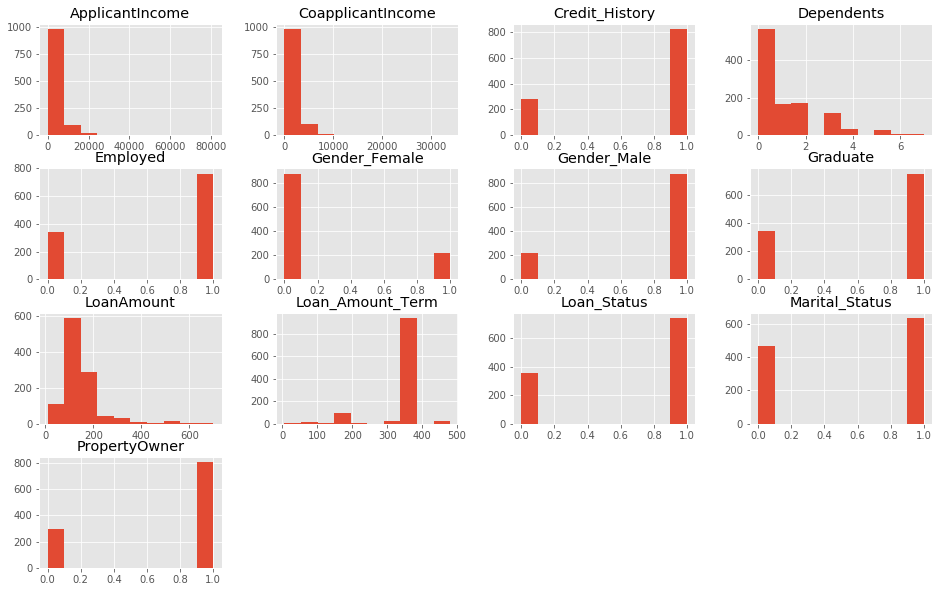

In [265]:
# Visualise the data and Plot histograms of each parameter 
data.hist(figsize = (16, 10))
plt.show()

In [266]:
# Determine number of falied loan cases in dataset

Pass = data[data['Loan_Status'] == 1]
Fail = data[data['Loan_Status'] == 0]


outlier_fraction = len(Fail)/float(len(Pass))
print(outlier_fraction)

print('Failed Applications: {}'.format(len(data[data['Loan_Status'] == 0])))
print('Passed Applications: {}'.format(len(data[data['Loan_Status'] == 1])))


0.48048452220726784
Failed Applications: 357
Passed Applications: 743


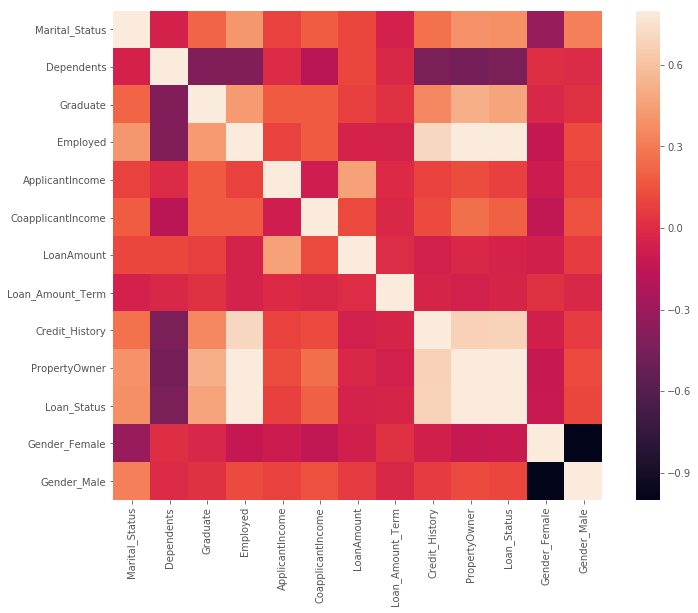

In [267]:
# Correlation matrix
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))

sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [268]:
#Put the datain a dataframe
#df = pd.DataFrame(data)
 
# Explore the Data
print(data.columns)
print("dimension of data data: {}".format(data.shape))
print(data.groupby('Loan_Status').size())

data.info()
#data = pd.get_dummies(df,columns=['Gender'])

Index(['Marital_Status', 'Dependents', 'Graduate', 'Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'PropertyOwner', 'Loan_Status',
       'Gender_Female', 'Gender_Male'],
      dtype='object')
dimension of data data: (1100, 13)
Loan_Status
0    357
1    743
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1100 entries, 0 to 1100
Data columns (total 13 columns):
Marital_Status       1100 non-null int32
Dependents           1100 non-null int64
Graduate             1100 non-null int32
Employed             1100 non-null int32
ApplicantIncome      1100 non-null float64
CoapplicantIncome    1100 non-null float64
LoanAmount           1100 non-null int64
Loan_Amount_Term     1100 non-null int64
Credit_History       1100 non-null int32
PropertyOwner        1100 non-null int32
Loan_Status          1100 non-null int32
Gender_Female        1100 non-null uint8
Gender_Male          1100 non-null uint8
dtypes: float64

In [269]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.loc[:, data.columns != 'Loan_Status'], data['Loan_Status'], stratify=data['Loan_Status'], test_size=0.30)



In [280]:
print("Shape of the X_train dataset: ", X_train.shape)
print("Shape of the y_train dataset: ", y_train.shape)
print("Shape of the X_test dataset: ", X_test.shape)
print("Shape of the y_test dataset: ", y_test.shape)
print('/n')
print("Training Dataset, counts of label '1': {}".format(sum(y_train==1)))
print("Training Dataset, counts of label '0': {}".format(sum(y_train==0)))
print("Testing Dataset, counts of label '1': {}".format(sum(y_test==1)))
print("Testing Dataset, counts of label '0': {}".format(sum(y_test==0)))

Shape of the X_train dataset:  (770, 12)
Shape of the y_train dataset:  (770,)
Shape of the X_test dataset:  (330, 12)
Shape of the y_test dataset:  (330,)
/n
Training Dataset, counts of label '1': 520
Training Dataset, counts of label '0': 250
Testing Dataset, counts of label '1': 223
Testing Dataset, counts of label '0': 107


0.757575757576
KNN  classifier accuracy on training set: 0.83
KNN  classifier accuracy on test set: 0.76
Precision: 0.778
Recall: 0.897
F1: 0.833


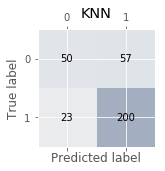

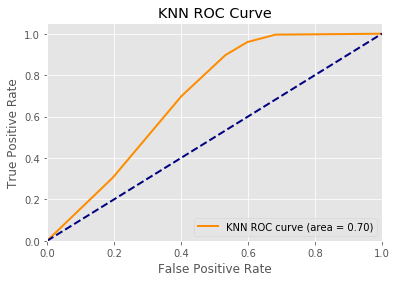

0.975757575758
NB  classifier accuracy on training set: 0.99
NB  classifier accuracy on test set: 0.98
Precision: 0.965
Recall: 1.000
F1: 0.982


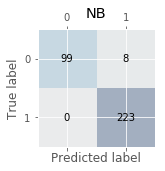

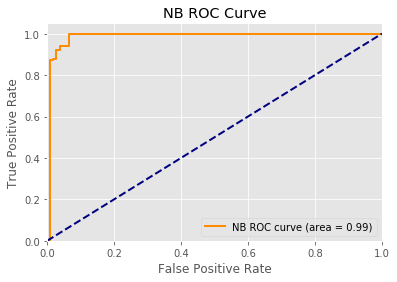

0.693939393939
ANN  classifier accuracy on training set: 0.66
ANN  classifier accuracy on test set: 0.69
Precision: 0.721
Recall: 0.892
F1: 0.798


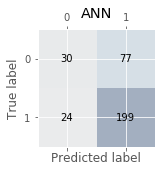

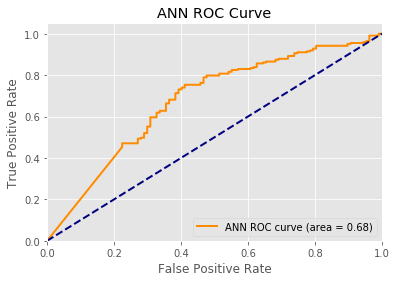

In [281]:


clfs = []
clfs.append(('KNN', KNeighborsClassifier()))
clfs.append(('NB', GaussianNB()))
clfs.append(('ANN', MLPClassifier()))


names = []
for name, clf in models:
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    y_predict_probabilities = clf.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_predict_probabilities)
    roc_auc = auc(fpr, tpr)
    confmat =confusion_matrix(y_true=y_test, y_pred=predictions)
    #print(confmat)
    print (accuracy_score(y_test, predictions))
    print(name,' classifier accuracy on training set: {:.2f}'.format(clf.score(X_train, y_train)))
    print(name,' classifier accuracy on test set: {:.2f}'.format(clf.score(X_test, y_test)))
    print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=predictions))
    print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=predictions))
    print('F1: %.3f' % f1_score(y_true=y_test, y_pred=predictions))
    fig, ax = plt.subplots(figsize=(2.5, 2.5))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
    plt.title(name)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.tight_layout()
    
    plt.figure()
    plt.title(name)
    plt.plot(fpr, tpr, color='darkorange',
             lw=2, label=name + ' ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(name +' ROC Curve')
    plt.legend(loc="lower right")
    
    
    
    
    
    
    
    
    plt.show()



